In [22]:
import numpy as np

x = [[[10, 2, 1],
      [1, -8, 2],
      [2, 3, -9]],
    [[-12, 2, -3],
     [3, 9, 1],
     [-2, 1, 10]],
    [[11, -1, 3],
     [2, 7, -2],
     [3, 2, 9]],
    [[-10, 5, 1],
     [-4, 11, -3],
     [-2, 3, -8]],
    [[8, 1, -2],
     [-3, 10, 2],
     [-1, -2, 9]]]

y = [[40, 1150, 18],
    [25, -10, 15],
    [30, -10, 12],
    [80, -700, 140],
    [15, 10, -5]]

x = np.array(x)
y = np.array(y)

def diag_check(x):
    diag = np.abs(np.diag(x))
    non_diag = np.abs(np.sum(x, axis=1)) / diag
    for i in range(len(diag)):
        if diag[i] < non_diag[i]:
            return False
    return True

def gauss_seidel(x, y, e = 0.01, n = 25):
    if not diag_check(x):
        print("Invalid Matrix")
        return

    x = x.copy()
    old_guess = np.zeros(np.shape(x[0]))
    diag = np.diag(x).copy()
    np.fill_diagonal(x, 0)

    for i in range(n):
        new_guess = np.array(old_guess)
        for j, row in enumerate(x):
            new_guess[j] = (y[j] - np.dot(row, new_guess)) / diag[j]
        print(f"Iter #{i+1}: {new_guess}")

        euclidean_distance = np.sqrt(np.dot(new_guess-old_guess, new_guess-old_guess))
        if euclidean_distance < e:
            print("Converged")
            return

        old_guess = new_guess

for i in range(len(x)):
    print(f"Equation {i+1}")
    gauss_seidel(x[i], y[i])
    print("\n")

Equation 1
Iter #1: [   4.         -143.25        -48.86111111]
Iter #2: [  37.53611111 -151.27326389  -44.08306327]
Iter #3: [  38.6629591  -149.93789593  -43.38752995]
Iter #4: [  38.32633218 -149.80609097  -43.41840095]
Iter #5: [  38.30305829 -149.81671795  -43.42711525]
Iter #6: [  38.30605512 -149.81852192  -43.42705062]
Converged


Equation 2
Iter #1: [-2.08333333 -0.41666667  1.125     ]
Iter #2: [-2.43402778 -0.42476852  1.0556713 ]
Iter #3: [-2.41804591 -0.42239262  1.05863008]
Iter #4: [-2.41838962 -0.4226068   1.05858276]
Converged


Equation 3
Iter #1: [ 2.72727273 -2.20779221  0.91486291]
Iter #2: [ 2.27705628 -1.81776953  0.97826336]
Iter #3: [ 2.29522185 -1.80484528  0.96933611]
Iter #4: [ 2.29883149 -1.80842725  0.96892889]
Converged


Equation 4
Iter #1: [ -8.         -66.54545455 -40.45454545]
Iter #2: [-45.31818182 -91.14876033 -40.35123967]
Iter #3: [-57.60950413 -95.59015778 -38.94393313]
Iter #4: [-59.6894722  -95.96269893 -38.56364405]
Iter #5: [-59.83771387 -95

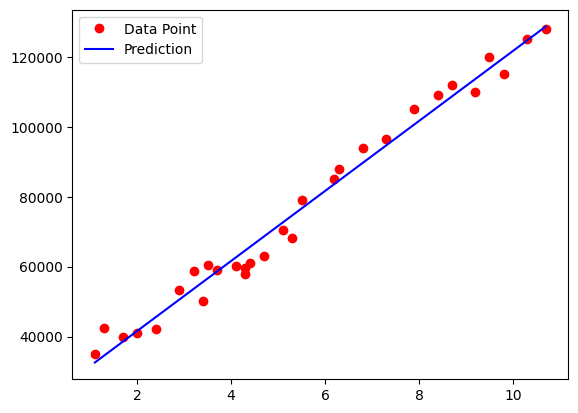

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1.1, 1.3, 1.7, 2.0, 2.4, 2.9, 3.2, 3.4, 3.5, 3.7, 4.1, 4.3, 4.3, 4.4, 4.7, 5.1,
        5.3, 5.5, 6.2, 6.3, 6.8, 7.3, 7.9, 8.4, 8.7, 9.2, 9.5, 9.8, 10.3, 10.7]

y = [35010.0, 42500.0, 39800.0, 41050.0, 42100.0, 53200.0, 58700.0, 50200.0, 60500.0, 59000.0,
        60100.0, 58000.0, 59500.0, 61000.0, 63000.0, 70500.0, 68200.0, 79000.0, 85000.0, 88000.0,
        94000.0, 96500.0, 105000.0, 109000.0, 112000.0, 110000.0, 120000.0, 115000.0, 125000.0, 128000.0]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
C = np.dot(np.linalg.pinv(A), y)

y_pred = C[0]*x + C[1]

plt.plot(x, y, "or")
plt.plot(x, y_pred, "b-")
plt.legend(["Data Point", "Prediction"])
plt.show()


In [ ]:
import numpy as np

def f(x):
    return 15 * x**5 + 6 * x**4 - 9
def g(x):
    return 75 * x**4 + 24 * x**3

def raphson(x, i = 1, tol = 0.01):
    x_new = x - (f(x)/g(x))
    print(f"Iterasi #{i}: {x_new} with result {f(x)}")
    if np.abs(f(x)) < tol:
        print("Converged")
        print(f"Root found at {x_new}")
        return

    raphson(x_new, i+1)

raphson(17)

In [21]:
import numpy as np

def f(x):
    return x**4 - 13 * x**3 + 36

x_min = -2
x_max = 2
n = 51

x = np.linspace(x_min, x_max, n)
width = x[1] - x[0]

# left riemman
total_length = np.sum(f(x[0:n-1]))
area = total_length * width
print(area)

# right riemman
total_length = np.sum(f(x[1:n]))
area = total_length * width
print(area)

# mid riemman
mid = (x[0:n-1] + x[1:n]) / 2
total_length = np.sum(f(mid))
area = total_length * width
print(area)

# trapesium riemman
a = np.sum(f(x[0:n-1]))
b = np.sum(f(x[1:n]))
area = (a + b) * width / 2
print(area)

165.15412787200015
148.51412787200013
156.78293811200012
156.83412787200012
